In [4]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [5]:
methods = [
    'No_Deconv', 'FPFS',
    'Tikhonet_Laplacian', 'ShapeNet', 
    'Richard-Lucy(10)', 'Richard-Lucy(20)', 
    'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
    'Unrolled_ADMM_Gaussian(2)', 'Unrolled_ADMM_Gaussian(4)', 'Unrolled_ADMM_Gaussian(8)'
]
snrs = [20, 40, 100]
texts = ['(10)', '(20)', '(30)', '(50)', '(100)', '(2)', '(4)', '(8)']
admmnet_errs = [0.11445783132530121, 0.06361445783132531, 0.02746987951807231]
bias_ys = [[-0.0155, 0.007],
          [0.0054, 0.0038],
          [0.0022, 0.0022]]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


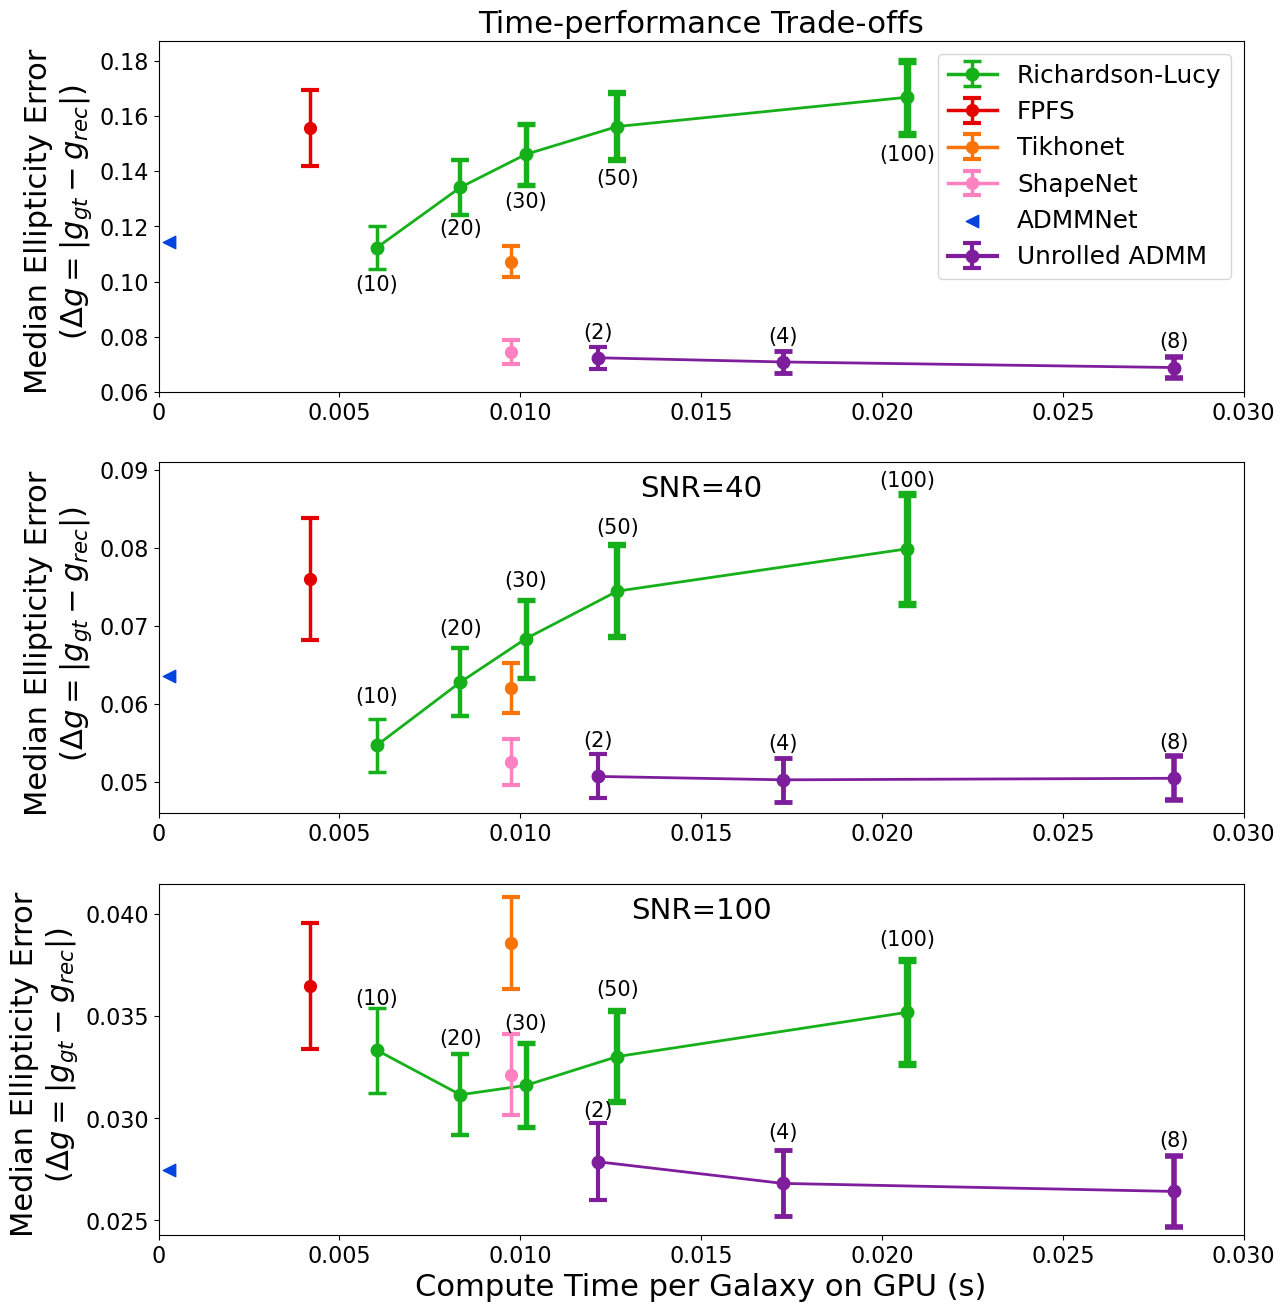

In [6]:
fig = plt.figure(figsize=(14,15.5), facecolor='white')
for idx, snr in enumerate(snrs):
    ax1 = plt.subplot(3,1,idx+1)
    shear_err_1, shear_err_2, g_errs, g_stds, g_sems, ts = [], [], [], [], [], []
    for method in methods:
        results_file = os.path.join('../results', method, f'results.json')
        with open(results_file, 'r') as f:
            results = json.load(f)
        gt_shear = np.array(results[str(snr)]['gt_shear'])
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        total_time, n_gal = results['time']
        ts.append(total_time/n_gal)
        g_errs.append(np.median(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
        g_sems.append(np.std(rec_err[:,2])/np.sqrt(np.shape(rec_err)[0]))

    errscale = 5
        
    # ax1.errorbar(ts[0:1], g_errs[0:1], yerr=np.multiply(errscale,g_sems[0:1]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[0]), label=get_label(methods[0]))
    
    ax1.plot(ts[4:9], g_errs[4:9], linewidth=2, color=get_color('Richard-Lucy'))
    for k, (t, g_err, g_sem) in enumerate(zip(ts[4:9], g_errs[4:9], g_sems[4:9])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color=get_color('Richard-Lucy'), label=get_label('Richard-Lucy'))
        else:
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color=get_color('Richard-Lucy'))
            
    ax1.errorbar(ts[1:2], g_errs[1:2], yerr=np.multiply(errscale,g_sems[1:2]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[1]), label=get_label(methods[1]))
    ax1.errorbar(ts[2:3], g_errs[2:3], yerr=np.multiply(errscale,g_sems[2:3]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[2]), label=get_label(methods[2]))
    ax1.errorbar(ts[3:4], g_errs[3:4], yerr=np.multiply(errscale,g_sems[3:4]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[3]), label=get_label(methods[3]))
    
    ax1.scatter([3e-4], [admmnet_errs[idx]], marker='<', s=80, color=get_color('ADMMNet'), label=get_label('ADMMNet'))
    
    ax1.plot(ts[9:12], g_errs[9:12], linewidth=2, color=get_color('Unrolled_ADMM_Gaussian'))
    for k, (t, g_err, g_sem) in enumerate(zip(ts[9:12], g_errs[9:12], g_sems[9:12])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color=get_color('Unrolled_ADMM_Gaussian'), label=get_label('Unrolled_ADMM_Gaussian'))
        else:
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color=get_color('Unrolled_ADMM_Gaussian'))
   
    for k, (t, g_err, text) in enumerate(zip(ts[4:], g_errs[4:], texts)):
        bias_y = bias_ys[idx][0] * (1+0.12*k) if k<=4 else bias_ys[idx][1]
        ax1.text(t, g_err+bias_y, text, fontsize=15, horizontalalignment='center')

    ax1.set_xlim([0, 0.03])
    # ax1.set_yscale('log')
    ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
    ax1.set_xticklabels(['0', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030'])
    ax1.set_title(f'SNR={snr}', y=1.0, pad=-25, fontsize=21)
    ax1.set_ylabel('Median Ellipticity Error \n ($\Delta g=|g_{gt} - g_{rec}|$)', fontsize=22)
    
    if idx == 0:
        handles,labels = ax1.get_legend_handles_labels()
        handles = [handles[1], handles[2], handles[3], handles[4], handles[0], handles[5]]
        labels = [labels[1], labels[2], labels[3], labels[4], labels[0], labels[5]]
        ax1.legend(handles, labels, fontsize=17.8)
        ax1.set_ylim([0.06, 0.187])
        ax1.set_yticks([0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18])
        ax1.set_yticklabels(['0.06', '0.08', '0.10', '0.12', '0.14', '0.16', '0.18'])
        plt.title('Time-performance Trade-offs', fontsize=22.2)
    elif idx == 1:
        ax1.set_ylim([0.046, 0.091])
        ax1.set_yticks([0.05, 0.06, 0.07, 0.08, 0.09])
        ax1.set_yticklabels(['0.05', '0.06', '0.07', '0.08', '0.09'])
    elif idx == 2:
        ax1.set_ylim([0.0243, 0.0415])
        ax1.set_yticks([0.025, 0.03, 0.035, 0.04])
        ax1.set_yticklabels(['0.025', '0.030', '0.035', '0.040'])
        ax1.set_xlabel('Compute Time per Galaxy on GPU (s)', fontsize=22)
    plt.tick_params(labelsize=16)
    
plt.savefig('error_time.eps', bbox_inches='tight')
plt.savefig('error_time.jpg', bbox_inches='tight')